<a href="https://colab.research.google.com/github/Cecill22/customer_review/blob/main/Cecilia_Aprillia_Nathania_Tugas_ML_1_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset: https://drive.google.com/file/d/1_y8gBBMH4jMnytpP5PszwFLLyA6NTBMJ/view?usp=sharing

##1. Preprocessing

In [ ]:
import pandas as pd
import string, re


!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 1.9 MB/s eta 0:00:00


In [ ]:
from tqdm import tqdm
tqdm.pandas()

In [ ]:
pth = '/content/drive/MyDrive/Colab Notebooks/Data/'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(pth+'sample_data_.csv')
print(df.shape)
df.head()

(1200, 3)


,Sentiment,Customer Review,corpus
0,Positive,"Barang bagus, pengiriman juga cepat. Cuma minu...","barang bagus, pengiriman juga cepat. cuma minu..."
1,Positive,LENGKAP BAGUS PENGIRIMAN CEPAT DAN TEPAT TERPE...,lengkap bagus pengiriman cepat dan tepat terpe...
2,Positive,"Bahan tipis, seller ramah, ekspedisi cpt","bahan tipis, seller ramah, ekspedisi cpt"
3,Positive,produk asli original. suplemen bagus tanpa efe...,produk asli original. suplemen bagus tanpa efe...
4,Positive,Model dan warna aku suka tp pemasangan sedikit...,model dan warna aku suka tp pemasangan sedikit...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Sentiment        1200 non-null   object
 1   Customer Review  1200 non-null   object
 2   corpus           1200 non-null   object
dtypes: object(3)
memory usage: 28.2+ KB


In [ ]:
df.Sentiment.value_counts()

Sentiment
Positive    600
Negative    600
Name: count, dtype: int64

###Punctuation

In [ ]:
df['corpus'] = df.corpus.str.translate(str.maketrans('', '', string.punctuation))
print(df.shape)
df.head()

(1200, 3)


,Sentiment,Customer Review,corpus
0,Positive,"Barang bagus, pengiriman juga cepat. Cuma minu...",barang bagus pengiriman juga cepat cuma minus ...
1,Positive,LENGKAP BAGUS PENGIRIMAN CEPAT DAN TEPAT TERPE...,lengkap bagus pengiriman cepat dan tepat terpe...
2,Positive,"Bahan tipis, seller ramah, ekspedisi cpt",bahan tipis seller ramah ekspedisi cpt
3,Positive,produk asli original. suplemen bagus tanpa efe...,produk asli original suplemen bagus tanpa efek...
4,Positive,Model dan warna aku suka tp pemasangan sedikit...,model dan warna aku suka tp pemasangan sedikit...


###Slangword

In [ ]:
slang_dict = pd.read_csv(pth+'kamusalay.csv', encoding='latin1',names=['alay','normal'])
slang_dict = dict(zip(slang_dict.alay.tolist(),slang_dict.normal.tolist()))

In [ ]:
def cvt_slang(sentence):
  return ''.join(' ').join(t for t in [slang_dict[x] if x in slang_dict.keys() else x for x in sentence.split()])

In [ ]:
df['corpus'] = df.corpus.apply(cvt_slang)
print(df.shape)
df.head()

(1200, 3)


,Sentiment,Customer Review,corpus
0,Positive,"Barang bagus, pengiriman juga cepat. Cuma minu...",barang bagus pengiriman juga cepat cuma minus ...
1,Positive,LENGKAP BAGUS PENGIRIMAN CEPAT DAN TEPAT TERPE...,lengkap bagus pengiriman cepat dan tepat terpe...
2,Positive,"Bahan tipis, seller ramah, ekspedisi cpt",bahan tipis seller ramah ekspedisi cepat
3,Positive,produk asli original. suplemen bagus tanpa efe...,produk asli original suplemen bagus tanpa efek...
4,Positive,Model dan warna aku suka tp pemasangan sedikit...,model dan warna aku suka tetapi pemasangan sed...


###Repetition Character

In [ ]:
def repetition_char(txt):
  sub_str = re.findall(r"((\w)\2{2,})",txt)
  for x in sub_str:
    txt = txt.replace(x[0],x[1])
  return txt

In [ ]:
df['corpus'] = df.corpus.apply(repetition_char)
df = df.reset_index(drop=True)
print(df.shape)
df.head()

(1200, 3)


,Sentiment,Customer Review,corpus
0,Positive,"Barang bagus, pengiriman juga cepat. Cuma minu...",barang bagus pengiriman juga cepat cuma minus ...
1,Positive,LENGKAP BAGUS PENGIRIMAN CEPAT DAN TEPAT TERPE...,lengkap bagus pengiriman cepat dan tepat terpe...
2,Positive,"Bahan tipis, seller ramah, ekspedisi cpt",bahan tipis seller ramah ekspedisi cepat
3,Positive,produk asli original. suplemen bagus tanpa efe...,produk asli original suplemen bagus tanpa efek...
4,Positive,Model dan warna aku suka tp pemasangan sedikit...,model dan warna aku suka tetapi pemasangan sed...


###Stemming

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

df['corpus'] = df.corpus.progress_apply(lambda x : stemmer.stem(str(x)))
print(df.shape)
df.head()

100%|██████████| 1200/1200 [04:21<00:00,  4.58it/s]

(1200, 3)


,Sentiment,Customer Review,corpus
0,Positive,"Barang bagus, pengiriman juga cepat. Cuma minu...",barang bagus kirim juga cepat cuma minus di pa...
1,Positive,LENGKAP BAGUS PENGIRIMAN CEPAT DAN TEPAT TERPE...,lengkap bagus kirim cepat dan tepat terpercaya...
2,Positive,"Bahan tipis, seller ramah, ekspedisi cpt",bahan tipis seller ramah ekspedisi cepat
3,Positive,produk asli original. suplemen bagus tanpa efe...,produk asli original suplemen bagus tanpa efek...
4,Positive,Model dan warna aku suka tp pemasangan sedikit...,model dan warna aku suka tetapi pasang sedikit...


###Stopword

In [ ]:
stops = pd.read_csv(pth+'stopwordbahasa.csv',header=None)
stop_factory = StopWordRemoverFactory()
STOPS = stop_factory.get_stop_words()+stops[0].tolist()
STOPS = set(STOPS)

In [ ]:
df['corpus'] = df.corpus.progress_apply(lambda c : ''.join(' ').join(x for x in c.split() if x not in STOPS))
print(df.shape)
df.head()

100%|██████████| 1200/1200 [00:00<00:00, 110009.72it/s]

(1200, 3)


,Sentiment,Customer Review,corpus
0,Positive,"Barang bagus, pengiriman juga cepat. Cuma minu...",barang bagus kirim cepat minus packaging nya r...
1,Positive,LENGKAP BAGUS PENGIRIMAN CEPAT DAN TEPAT TERPE...,lengkap bagus kirim cepat terpercayaa nomor 1 ...
2,Positive,"Bahan tipis, seller ramah, ekspedisi cpt",bahan tipis seller ramah ekspedisi cepat
3,Positive,produk asli original. suplemen bagus tanpa efe...,produk asli original suplemen bagus efek sampi...
4,Positive,Model dan warna aku suka tp pemasangan sedikit...,model warna suka pasang ribet moga awet


In [ ]:
#save to csv
df.to_csv(pth+'data_bersih.csv',index=False)

##2. Classification & Modelling

In [ ]:
import pandas as pd
from time import time
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
pth = '/content/drive/MyDrive/Colab Notebooks/Data/'

In [ ]:
df = pd.read_csv(pth+'data_bersih.csv')
print(df.shape)
df.head()

(1200, 3)


,Sentiment,Customer Review,corpus
0,Positive,"Barang bagus, pengiriman juga cepat. Cuma minu...",barang bagus kirim cepat minus packaging nya r...
1,Positive,LENGKAP BAGUS PENGIRIMAN CEPAT DAN TEPAT TERPE...,lengkap bagus kirim cepat terpercayaa nomor 1 ...
2,Positive,"Bahan tipis, seller ramah, ekspedisi cpt",bahan tipis seller ramah ekspedisi cepat
3,Positive,produk asli original. suplemen bagus tanpa efe...,produk asli original suplemen bagus efek sampi...
4,Positive,Model dan warna aku suka tp pemasangan sedikit...,model warna suka pasang ribet moga awet


In [ ]:
df.isnull().sum()

Sentiment          0
Customer Review    0
corpus             3
dtype: int64

In [ ]:
df = df.dropna()
print(df.shape)
print(df.Sentiment.value_counts())

(1197, 3)
Sentiment
Positive    599
Negative    598
Name: count, dtype: int64


In [ ]:
x, y =df.corpus, df.Sentiment

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
print("train size:",x_train.shape)
print("test size:",x_test.shape)

train size: (837, 2441)
test size: (360, 2441)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

st = time()
model = SVC()
model.fit(x_train, y_train)
print("[DONE] training process finished:", time() - st, "second(s)\n")

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of SVM model:", accuracy * 100,"%\n")

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

[DONE] training process finished: 0.11476349830627441 second(s)

Accuracy of SVM model: 85.0 %

              precision    recall  f1-score   support

    Negative       0.80      0.91      0.85       172
    Positive       0.91      0.79      0.85       188

    accuracy                           0.85       360
   macro avg       0.85      0.85      0.85       360
weighted avg       0.86      0.85      0.85       360

[[157  15]
 [ 39 149]]


<Axes: >

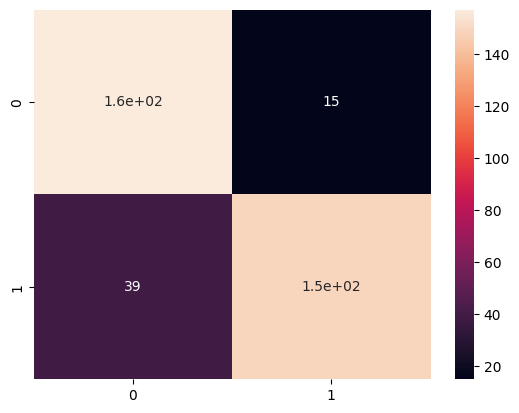

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)